In [3]:
include("../src/Julia.jl")

parseCPPData (generic function with 1 method)

In [4]:
data = []

graphFolder = "../../graphs/ipm_grid3_8000_all/"
allGraphs = readdir(graphFolder);

In [5]:
data = []

for graph in allGraphs
    
    if contains(graph, "ipm_grid") == false
        continue
    end
    
    println(graph)
    
    A = readFromFile(graphFolder * graph * "/graph.mtx");
    tree = readFromFile(graphFolder * graph * "/tree1.mtx")
    
    # make sure tree is weighted properly
    needReweighing = false
    
    u,v,w = findnz(tree)
    for i in 1:length(u)
        if tree[u[i], v[i]] != A[u[i], v[i]]
            needReweighing = true
        end
        
        tree[u[i], v[i]] = A[u[i], v[i]]
    end
    
    if needReweighing
        println("tree had bad weights - fixed now")
    end
    
    
    stretch = compStretches(tree, A);
    S = sum(stretch.nzval);
    
    println("log stretch is ", log(S))
    
    for precision in ["default", "64", "128", "256", "512", "1024"]
        logName = graphFolder * graph * "/_log_julia_tree1_" * precision * ".txt"
        logNorm = parseData(logName, only2=true)
        
        # most graphs seem to have 1000 iters - pathDisjoint_1000 only has 300
        for iter in [100, 200, 300, 500, 1000]
            try
                expectedS = iter / log(1 / logNorm[iter])

                # the above should be S^(1/3) - in theory. So, let's cube it up
                expectedS = expectedS^3

                push!(data, (S, expectedS, precision, iter))
            catch
                # skip what we can
            end
        end
    end
    
    println("\n")
end

ipm_grid3_8000_1
log stretch is 10.857280050840574


ipm_grid3_8000_10
log stretch is 11.502032540246574


ipm_grid3_8000_100
log stretch is 11.075617219662405


ipm_grid3_8000_101
log stretch is 10.349911719405739


ipm_grid3_8000_102
log stretch is 10.502696678109526


ipm_grid3_8000_103
log stretch is 10.714567589468052


ipm_grid3_8000_104
log stretch is 10.400401954238001


ipm_grid3_8000_105
log stretch is 10.501700132350079


ipm_grid3_8000_106
log stretch is 10.582906367470494


ipm_grid3_8000_107
log stretch is 10.492179006459887


ipm_grid3_8000_108
log stretch is 10.653787914066752


ipm_grid3_8000_109
log stretch is 10.589455219252581


ipm_grid3_8000_11
log stretch is 11.997224115199835


ipm_grid3_8000_110
log stretch is 10.47443343812902


ipm_grid3_8000_111
log stretch is 10.47428280805132


ipm_grid3_8000_112
log stretch is 10.472097316233906


ipm_grid3_8000_113
log stretch is 10.478362191959041


ipm_grid3_8000_114
log stretch is 10.663956306166861


ipm_grid3_8000_1

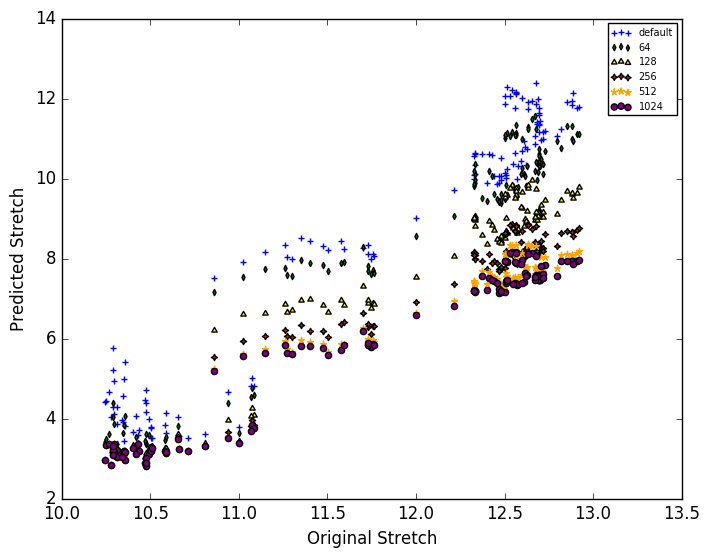

PyObject <matplotlib.text.Text object at 0x31f243490>

In [14]:
# let's do a plot now
# say, for 100 iterations

color = ["blue", "green", "yellow", "brown", "orange", "purple"]
markers = ["+", (2,1), (3,1), (4,1), (5,2), (4,3)]

maxx = 0
maxy = 0

ind = 0
for precision in ["default", "64", "128", "256", "512", "1024"]
    ind = ind + 1
    
    origS = Array{Float64,1}(0)
    myS = Array{Float64,1}(0)
    
    for dat in data
        if dat[3] == precision && dat[4] == 100
            push!(origS, dat[1])
            push!(myS, dat[2])
        end
    end
    
    maxx = max(maxx, maximum(origS))
    maxy = max(maxy, maximum(myS))
    
    scatter(log(origS), log(myS), label=precision, s = 20, c=color[ind], marker=markers[ind])
end

maxx = log(maxx) + 2
maxy = log(maxy) + 2

# xlim([2, maxx])
# ylim([2, maxy])

legend(fontsize=7)
ylabel("Predicted Stretch")
xlabel("Original Stretch")

# savefig(ipmFolder * "convergencePlot.png")

# PyPlot.clf()